# 🧪 ROUGE-Evaluation: LexRank vs. Luhn


In [3]:
!pip install rouge-score

In [4]:
from rouge_score import rouge_scorer
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
texts = {
    "Wikipedia": {
        "reference": """The Great Barrier Reef is the world's largest coral reef system, composed of over 2,900 individual reefs 
and 900 islands stretching for over 2,300 kilometers. Located in the Coral Sea off the coast of Queensland, 
Australia, it can be seen from outer space and is the world's biggest single structure made by living organisms. 
A large part of the reef is protected by the Great Barrier Reef Marine Park, which helps to limit the impact of 
human use such as fishing and tourism.""",
        "lexrank": """The Great Barrier Reef is the world's largest coral reef system, composed of over 2,900 individual reefs and 900 islands stretching for over 2,300 kilometers. Located in the Coral Sea off the coast of Queensland, Australia, it can be seen from outer space and is the world's biggest single structure made by living organisms.""",
        "luhn": """The Great Barrier Reef is the world's largest coral reef system, composed of over 2,900 individual reefs and 900 islands stretching for over 2,300 kilometers. A large part of the reef is protected by the Great Barrier Reef Marine Park, which helps to limit the impact of human use such as fishing and tourism."""
    },
    "News": {
        "reference": """The Prime Minister announced new measures today aimed at reducing inflation and stabilizing the economy. 
The proposed plan includes tax incentives for small businesses, a temporary cap on energy prices, and increased 
investment in renewable energy infrastructure. Economists are cautiously optimistic but warn that external factors, 
such as global market instability, could complicate recovery efforts.""",
        "lexrank": """The Prime Minister announced new measures today aimed at reducing inflation and stabilizing the economy. The proposed plan includes tax incentives for small businesses, a temporary cap on energy prices, and increased investment in renewable energy infrastructure.""",
        "luhn": """The Prime Minister announced new measures today aimed at reducing inflation and stabilizing the economy. The proposed plan includes tax incentives for small businesses, a temporary cap on energy prices, and increased investment in renewable energy infrastructure."""
    },
    "Social Media": {
        "reference": """Can’t believe the weather today! 🥵 It’s mid-October and it feels like summer again. 
Global warming is real, folks. #climatechange #heatwave""",
        "lexrank": """Can’t believe the weather today! 🥵 It’s mid-October and it feels like summer again.""",
        "luhn": """Can’t believe the weather today! 🥵 It’s mid-October and it feels like summer again."""
    },
    "Romance": {
        "reference": """She gazed across the table, her fingers nervously twisting the edge of her napkin. 
He smiled, reaching out gently to take her hand. In that moment, the noise of the crowded café faded into silence, 
and the only thing that mattered was the way he looked at her — like she was the only person in the world.""",
        "lexrank": """She gazed across the table, her fingers nervously twisting the edge of her napkin. He smiled, reaching out gently to take her hand.""",
        "luhn": """She gazed across the table, her fingers nervously twisting the edge of her napkin. In that moment, the noise of the crowded café faded into silence, and the only thing that mattered was the way he looked at her — like she was the only person in the world."""
    },
    "Manual": {
        "reference": """To reset the router, locate the reset button at the back of the device. Using a paperclip, press and hold the button 
for at least 10 seconds. The router lights will flash, and the device will reboot. After rebooting, 
use the default login credentials found on the bottom of the router to reconfigure your settings.""",
        "lexrank": """To reset the router, locate the reset button at the back of the device. Using a paperclip, press and hold the button for at least 10 seconds.""",
        "luhn": """To reset the router, locate the reset button at the back of the device. The router lights will flash, and the device will reboot."""
    },
    "Science": {
        "reference": """Recent studies in quantum computing have demonstrated significant advances in error correction algorithms. 
By introducing topological qubits, researchers are able to reduce decoherence and maintain entanglement for longer periods. 
These breakthroughs pave the way for more stable quantum systems, bringing practical applications within reach.""",
        "lexrank": """Recent studies in quantum computing have demonstrated significant advances in error correction algorithms. By introducing topological qubits, researchers are able to reduce decoherence and maintain entanglement for longer periods.""",
        "luhn": """Recent studies in quantum computing have demonstrated significant advances in error correction algorithms. These breakthroughs pave the way for more stable quantum systems, bringing practical applications within reach."""
    }
}

In [6]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
results = []
for genre, summaries in texts.items():
    reference = summaries["reference"]
    for method in ["lexrank", "luhn"]:
        generated = summaries[method]
        scores = scorer.score(reference, generated)
        results.append({
            "Texttyp": genre,
            "Methode": method.capitalize(),
            "ROUGE-1 (F1)": round(scores["rouge1"].fmeasure, 4),
            "ROUGE-2 (F1)": round(scores["rouge2"].fmeasure, 4)
        })

df_results = pd.DataFrame(results)
df_results["Differenz (R1 - R2)"] = df_results["ROUGE-1 (F1)"] - df_results["ROUGE-2 (F1)"]
df_results

,Texttyp,Methode,ROUGE-1 (F1),ROUGE-2 (F1),Differenz (R1 - R2)
0,Wikipedia,Lexrank,0.8000,0.7972,0.0028
1,Wikipedia,Luhn,0.7917,0.7746,0.0171
2,News,Lexrank,0.8043,0.8000,0.0043
3,News,Luhn,0.8043,0.8000,0.0043
4,Social Media,Lexrank,0.8205,0.8108,0.0097
5,Social Media,Luhn,0.8205,0.8108,0.0097
6,Romance,Lexrank,0.5750,0.5641,0.0109
7,Romance,Luhn,0.9143,0.8932,0.0211
8,Manual,Lexrank,0.6585,0.6500,0.0085
9,Manual,Luhn,0.6076,0.5714,0.0362


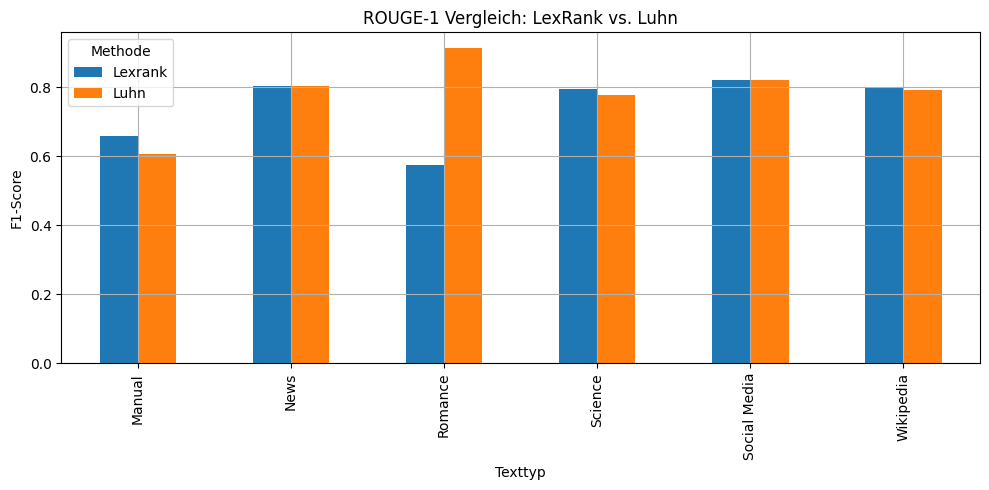

In [7]:
pivot_df = df_results.pivot(index="Texttyp", columns="Methode", values="ROUGE-1 (F1)")
pivot_df.plot(kind="bar", figsize=(10, 5), title="ROUGE-1 Vergleich: LexRank vs. Luhn")
plt.ylabel("F1-Score")
plt.grid(True)
plt.tight_layout()
plt.show()

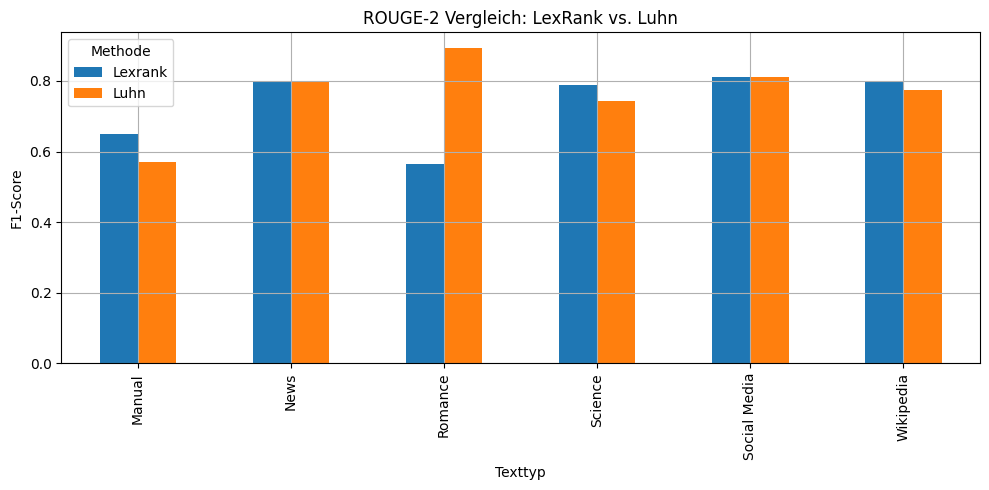

In [8]:
pivot_df = df_results.pivot(index="Texttyp", columns="Methode", values="ROUGE-2 (F1)")
pivot_df.plot(kind="bar", figsize=(10, 5), title="ROUGE-2 Vergleich: LexRank vs. Luhn")
plt.ylabel("F1-Score")
plt.grid(True)
plt.tight_layout()
plt.show()


### ROUGE-F1 Score Bewertungstabelle

| ROUGE-F1 Score | Bewertung       |
|----------------|-----------------|
| **> 0.60**     |  **Sehr gut**   |
| **0.45 – 0.60**|  **Gut**        |
| **0.30 – 0.45**|  **Mittelmäßig** |
| **0.15 – 0.30**|  **Schwach**    |
| **< 0.15**     |  **Sehr schwach**|


